# Advection Equation

Here we solve the advection equation $u_t + a u_x=0$ using as an initial condition a gaussian profile $u(x,t=0)=\exp{[-(x-x_0)^2]}$ with $x_0=5$.

We use a domain $x\in [0,10]$ with periodic boundary conditions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

#define the speed a
a=1.0

# Define the domain
L = 10.0     # Domain length
nx = 201    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

##print(x,'\n',dx) #just a check

# Define the time step and the final time
cf = 0.5
dt = cf*dx/a   # Time step
t_final = 20.0

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)


# Define the initial condition
x0=5
u_initial = np.exp(-(x-x0)**2)

# Initialize the solution array
u_current = u_initial.copy()      # use copy in np, otherwise with = is interpreted as a pointer

#we create arrays where we will store the time and the l2norm
l2norm=[]
l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time=[]
time.append(0.0)

nx= 201
dx= 0.05
dt= 0.025
Number of iterations= 800.0


In [2]:
import matplotlib.pyplot as plt
import os
##create directory where to save images
print(os.getcwd())

os.makedirs('./images_lax')

os.listdir('./')

/Users/giulia/coding/numerical/Advection


['l2norm_FTCS.dat',
 'Lax_Equation.ipynb',
 'Lax_equation',
 '.DS_Store',
 'images_lax',
 'movie_advection.mp4',
 'images',
 'images_advection',
 'README.md',
 'l2norm_LAXWENDROFF.dat',
 'Advection_Equation.ipynb',
 '.ipynb_checkpoints',
 'l2norm_LAX.dat',
 'l2norm_LEAPFROG.dat']

In [3]:
# Initilize time and iteration counter
t = 0.0
i = 0

#save the initial conditions
plt.plot(x, u_current)
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.savefig('./images_lax/fig_'+str(i).zfill(5)+'.png', dpi=200)
plt.close()

#solve the advection equation
while t < t_final:
    # Compute the new solution using the FTCS method
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    u_next = 0.5 * (np.roll(u_current, +1) + np.roll(u_current, -1)) - a*dt/(2*dx)*(np.roll(u_current, -1) - np.roll(u_current, +1))
    # np.roll() shifts the array of a certain value --> here we're using periodic BC (so we "cheat" this way)
    
    # Update the solution
    u_current = u_next.copy()
    
    
    #advance the time 
    t += dt
    i += 1
    
    #compute the l2 norm and add the time to the time vector
    l2norm.append(np.sqrt(np.sum(u_current**2)/len(u_current)))
    time.append(t)
    
    #plot the current result and save in an image every 10 iterations
    if (i%10==0):
        plt.plot(x, u_current)
        plt.title('Time='+str(round(t,2)))
        plt.ylim(0,1.1)
        plt.savefig('./images_lax/fig_'+str(i).zfill(5)+'.png', dpi=200)
        plt.close()


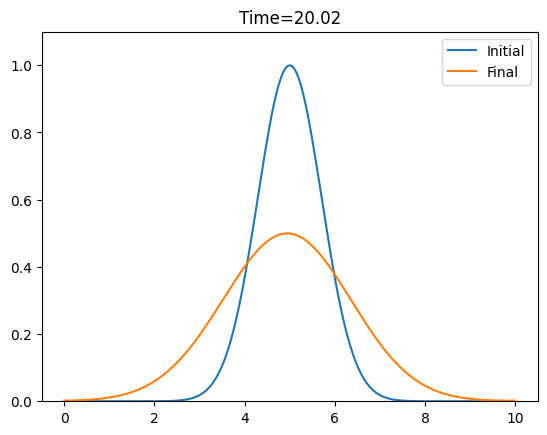

In [4]:
# Plot the final solution
plt.plot(x, u_initial, label='Initial')
plt.plot(x, u_current, label='Final')
plt.title('Time='+str(round(t,2)))
plt.ylim(0,1.1)
plt.legend()
plt.show()

In [5]:
# set the directory where your images are stored
directory = "./images_lax/"

# get the list of image files in the directory
files = os.listdir(directory)

print(files, '\n')

# sort the files in alphanumeric order
files=sorted(files)

print(files)




['fig_00500.png', 'fig_00070.png', 'fig_00110.png', 'fig_00460.png', 'fig_00310.png', 'fig_00660.png', 'fig_00700.png', 'fig_00270.png', 'fig_00260.png', 'fig_00710.png', 'fig_00670.png', 'fig_00300.png', 'fig_00470.png', 'fig_00100.png', 'fig_00060.png', 'fig_00510.png', 'fig_00370.png', 'fig_00600.png', 'fig_00760.png', 'fig_00210.png', 'fig_00560.png', 'fig_00010.png', 'fig_00170.png', 'fig_00400.png', 'fig_00410.png', 'fig_00160.png', 'fig_00000.png', 'fig_00570.png', 'fig_00200.png', 'fig_00770.png', 'fig_00610.png', 'fig_00360.png', 'fig_00230.png', 'fig_00740.png', 'fig_00620.png', 'fig_00350.png', 'fig_00190.png', 'fig_00580.png', 'fig_00780.png', 'fig_00390.png', 'fig_00420.png', 'fig_00150.png', 'fig_00030.png', 'fig_00540.png', 'fig_00550.png', 'fig_00020.png', 'fig_00140.png', 'fig_00430.png', 'fig_00380.png', 'fig_00800.png', 'fig_00790.png', 'fig_00590.png', 'fig_00180.png', 'fig_00340.png', 'fig_00630.png', 'fig_00750.png', 'fig_00220.png', 'fig_00290.png', 'fig_00680.pn

In [6]:
#import imageio
import imageio.v2 as imageio
with imageio.get_writer('./movie.mp4', mode='I', quality=10) as writer:
    for file in files:
        image = imageio.imread('./images_lax/'+file)
        writer.append_data(image)
        
files=[]

In [7]:
# don't worry about the code in this cell, it is just to let you 
# display the movies you generated above in Jupyter notebook
from IPython.display import HTML

HTML("""
<div align="middle">
<video width="80%" controls>
      <source src="./movie.mp4" type="video/mp4">
</video></div>""")

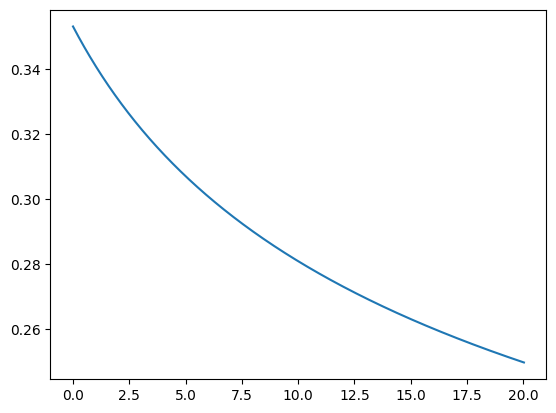

In [8]:
plt.plot(time,l2norm)
plt.show()

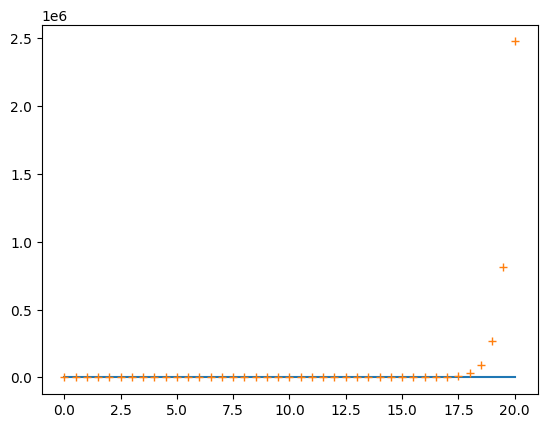

In [22]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_FTCS.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.show()

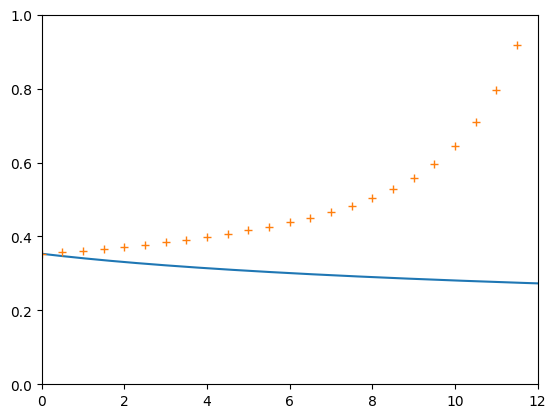

In [23]:
#Compare with data stored
l2_saved=np.genfromtxt('./l2norm_FTCS.dat', comments='#')
plt.plot(time,l2norm)
plt.plot(l2_saved[:,0], l2_saved[:,1], '+')
plt.xlim(0,12)
plt.ylim(0,1)
plt.show()